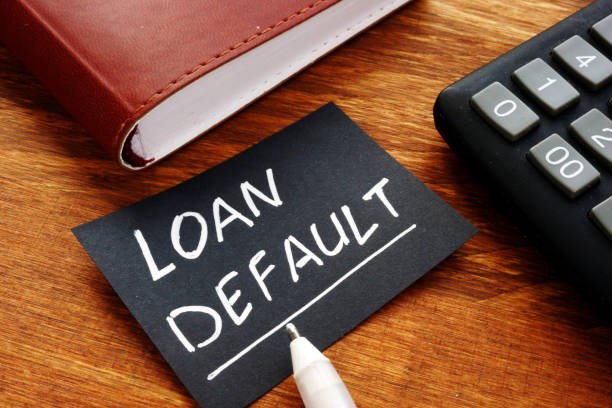

# Problem Statment:

Description: Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters?

Objective: Understand the Dataset & cleanup (if required). Build classification model to predict weather the loan borrower will default or not. Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

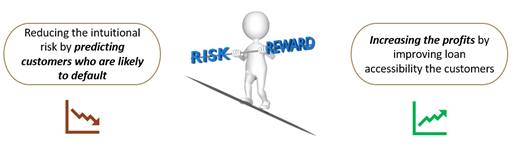

In [173]:
#Load the necessary python libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras import callbacks


# Load the data

In [107]:
#load the data and First look for data
df = pd.read_csv('../input/loan-default-dataset/Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


# Features
* ID = Customer ID of Applicant
* year = Year of Application
* loan limit = maximum avaliable amount of the loan allowed to be taken
* Gender = sex type
* approv_in_adv = Is loan pre-approved or not
* loan_type = Type of loan
* loan_purpose = the reason you want to borrow money
* Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
* open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
* business_or_commercial = Usage type of the loan amount
* loan_amount = The exact loan amount
* rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
* Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
* Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
* term = the loan's repayment period
* Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
* interest_only = amount of interest only without principles
* lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
* property_value = the present worth of future benefits arising from the ownership of the property
* construction_type = Collateral construction type
* occupancy_type = classifications refer to categorizing structures based on their usage
* Secured_by = Type of Collatoral
* total_units = number of unites
* income = refers to the amount of money, property, and other transfers of value received over a set period of time
* credit_type = type of credit
* co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
* age = applicant's age
* submission_of_application = Ensure the application is complete or not
* LTV = life-time value (LTV) is a prognostication of the net profit
* Region = applicant's place
* Security_Type = Type of Collatoral
* status = Loan status (Approved/Declined)
* dtir1 = debt-to-income ratio

# looking for More information of our data

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

in our data some features are in int variables and some are catagorical variables

In [109]:
#checking shape of our dataset
df.shape

(148670, 34)

We have 34 features of total 148670 ids/rows.

In [110]:
#checking all features names
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [111]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [112]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

loan defaulted : 1 = 36639
and not defaulted : 0 =   112031

In [113]:
#checking duplicates 
df.duplicated().sum()

0

In [114]:
#checking null values
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

Thera are null values,which must be filled

# Some Characteristics of data & Visualization

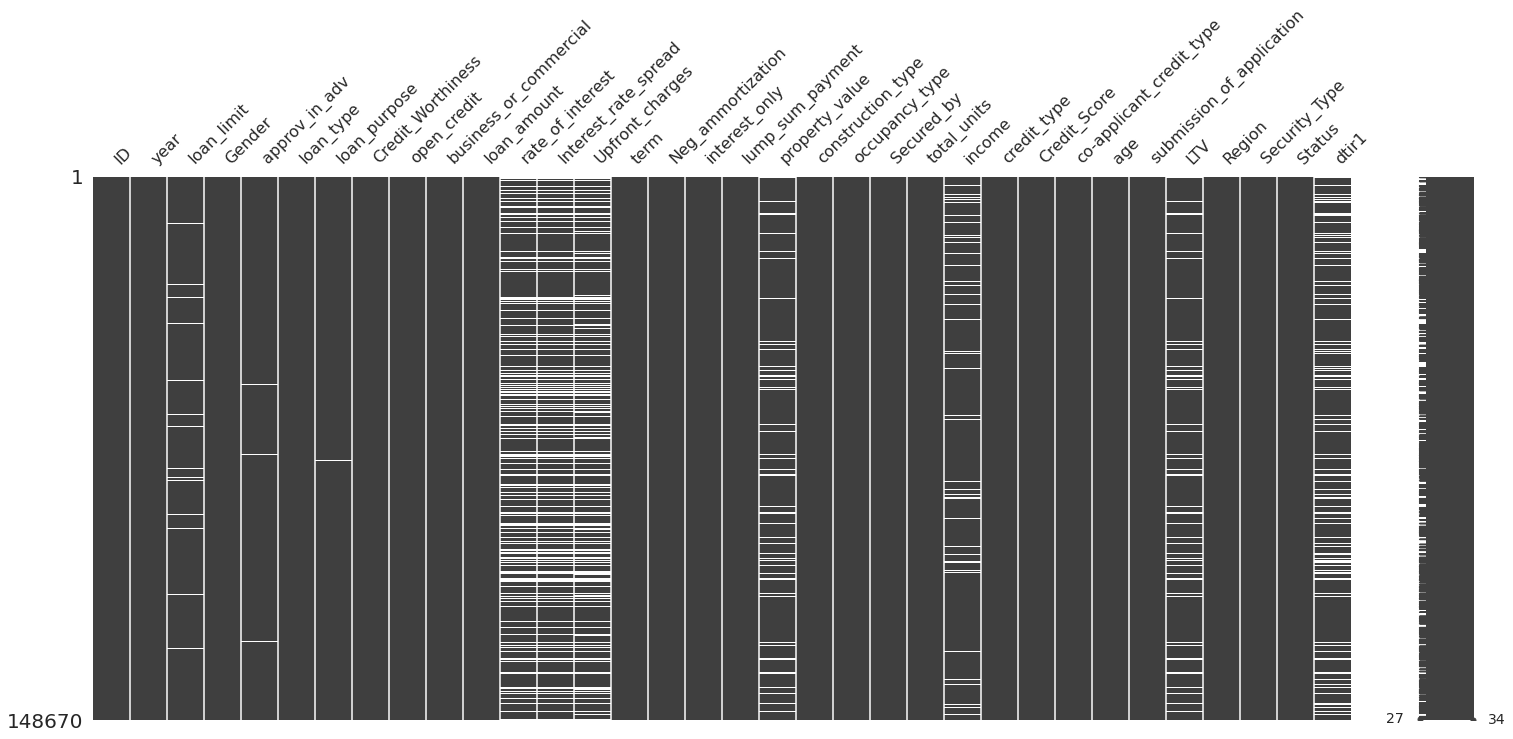

In [115]:
#null values distribution
msno.matrix(df)
plt.show()

# Checking if the Loan defaulter is dependent on Gender

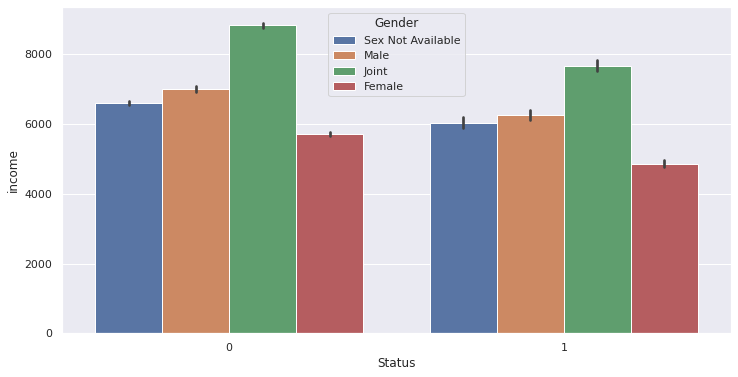

In [116]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='Status',y='income',hue='Gender')
fig.set_size_inches([12,6])
plt.show()

In [117]:
df['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

# How Loan defaulter is related to Credit score and Loan Amount

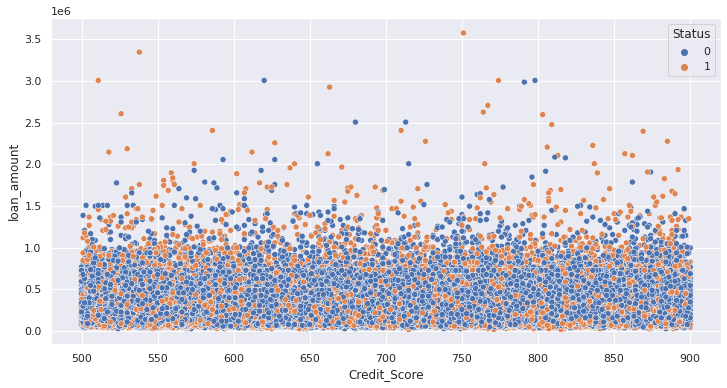

In [118]:
fig,ax=plt.subplots()
sns.scatterplot(x='Credit_Score',y='loan_amount',data=df,hue='Status')
fig.set_size_inches([12,6])
plt.show()

# Let plot Pie and count plot

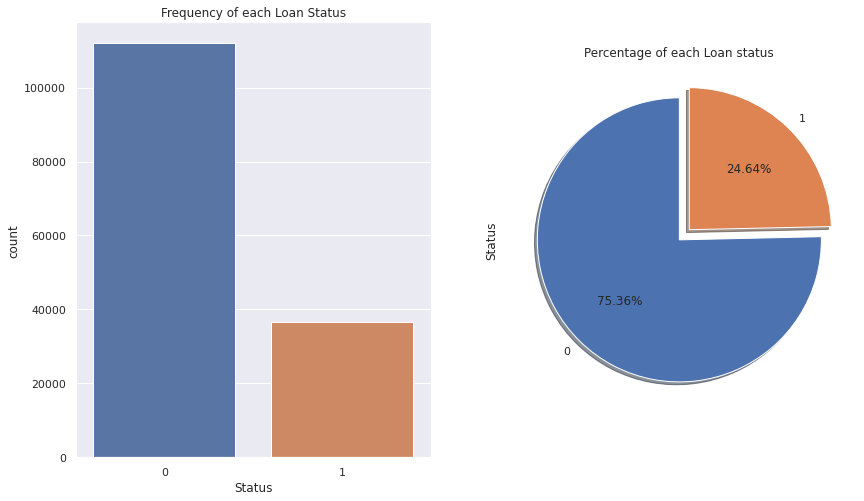

In [119]:
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='Status',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.Status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

This clearly is a case of an imbalanced class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

Here, We have finalize loan status as our target variable which has now 24 % are defaulters for the loan payment.

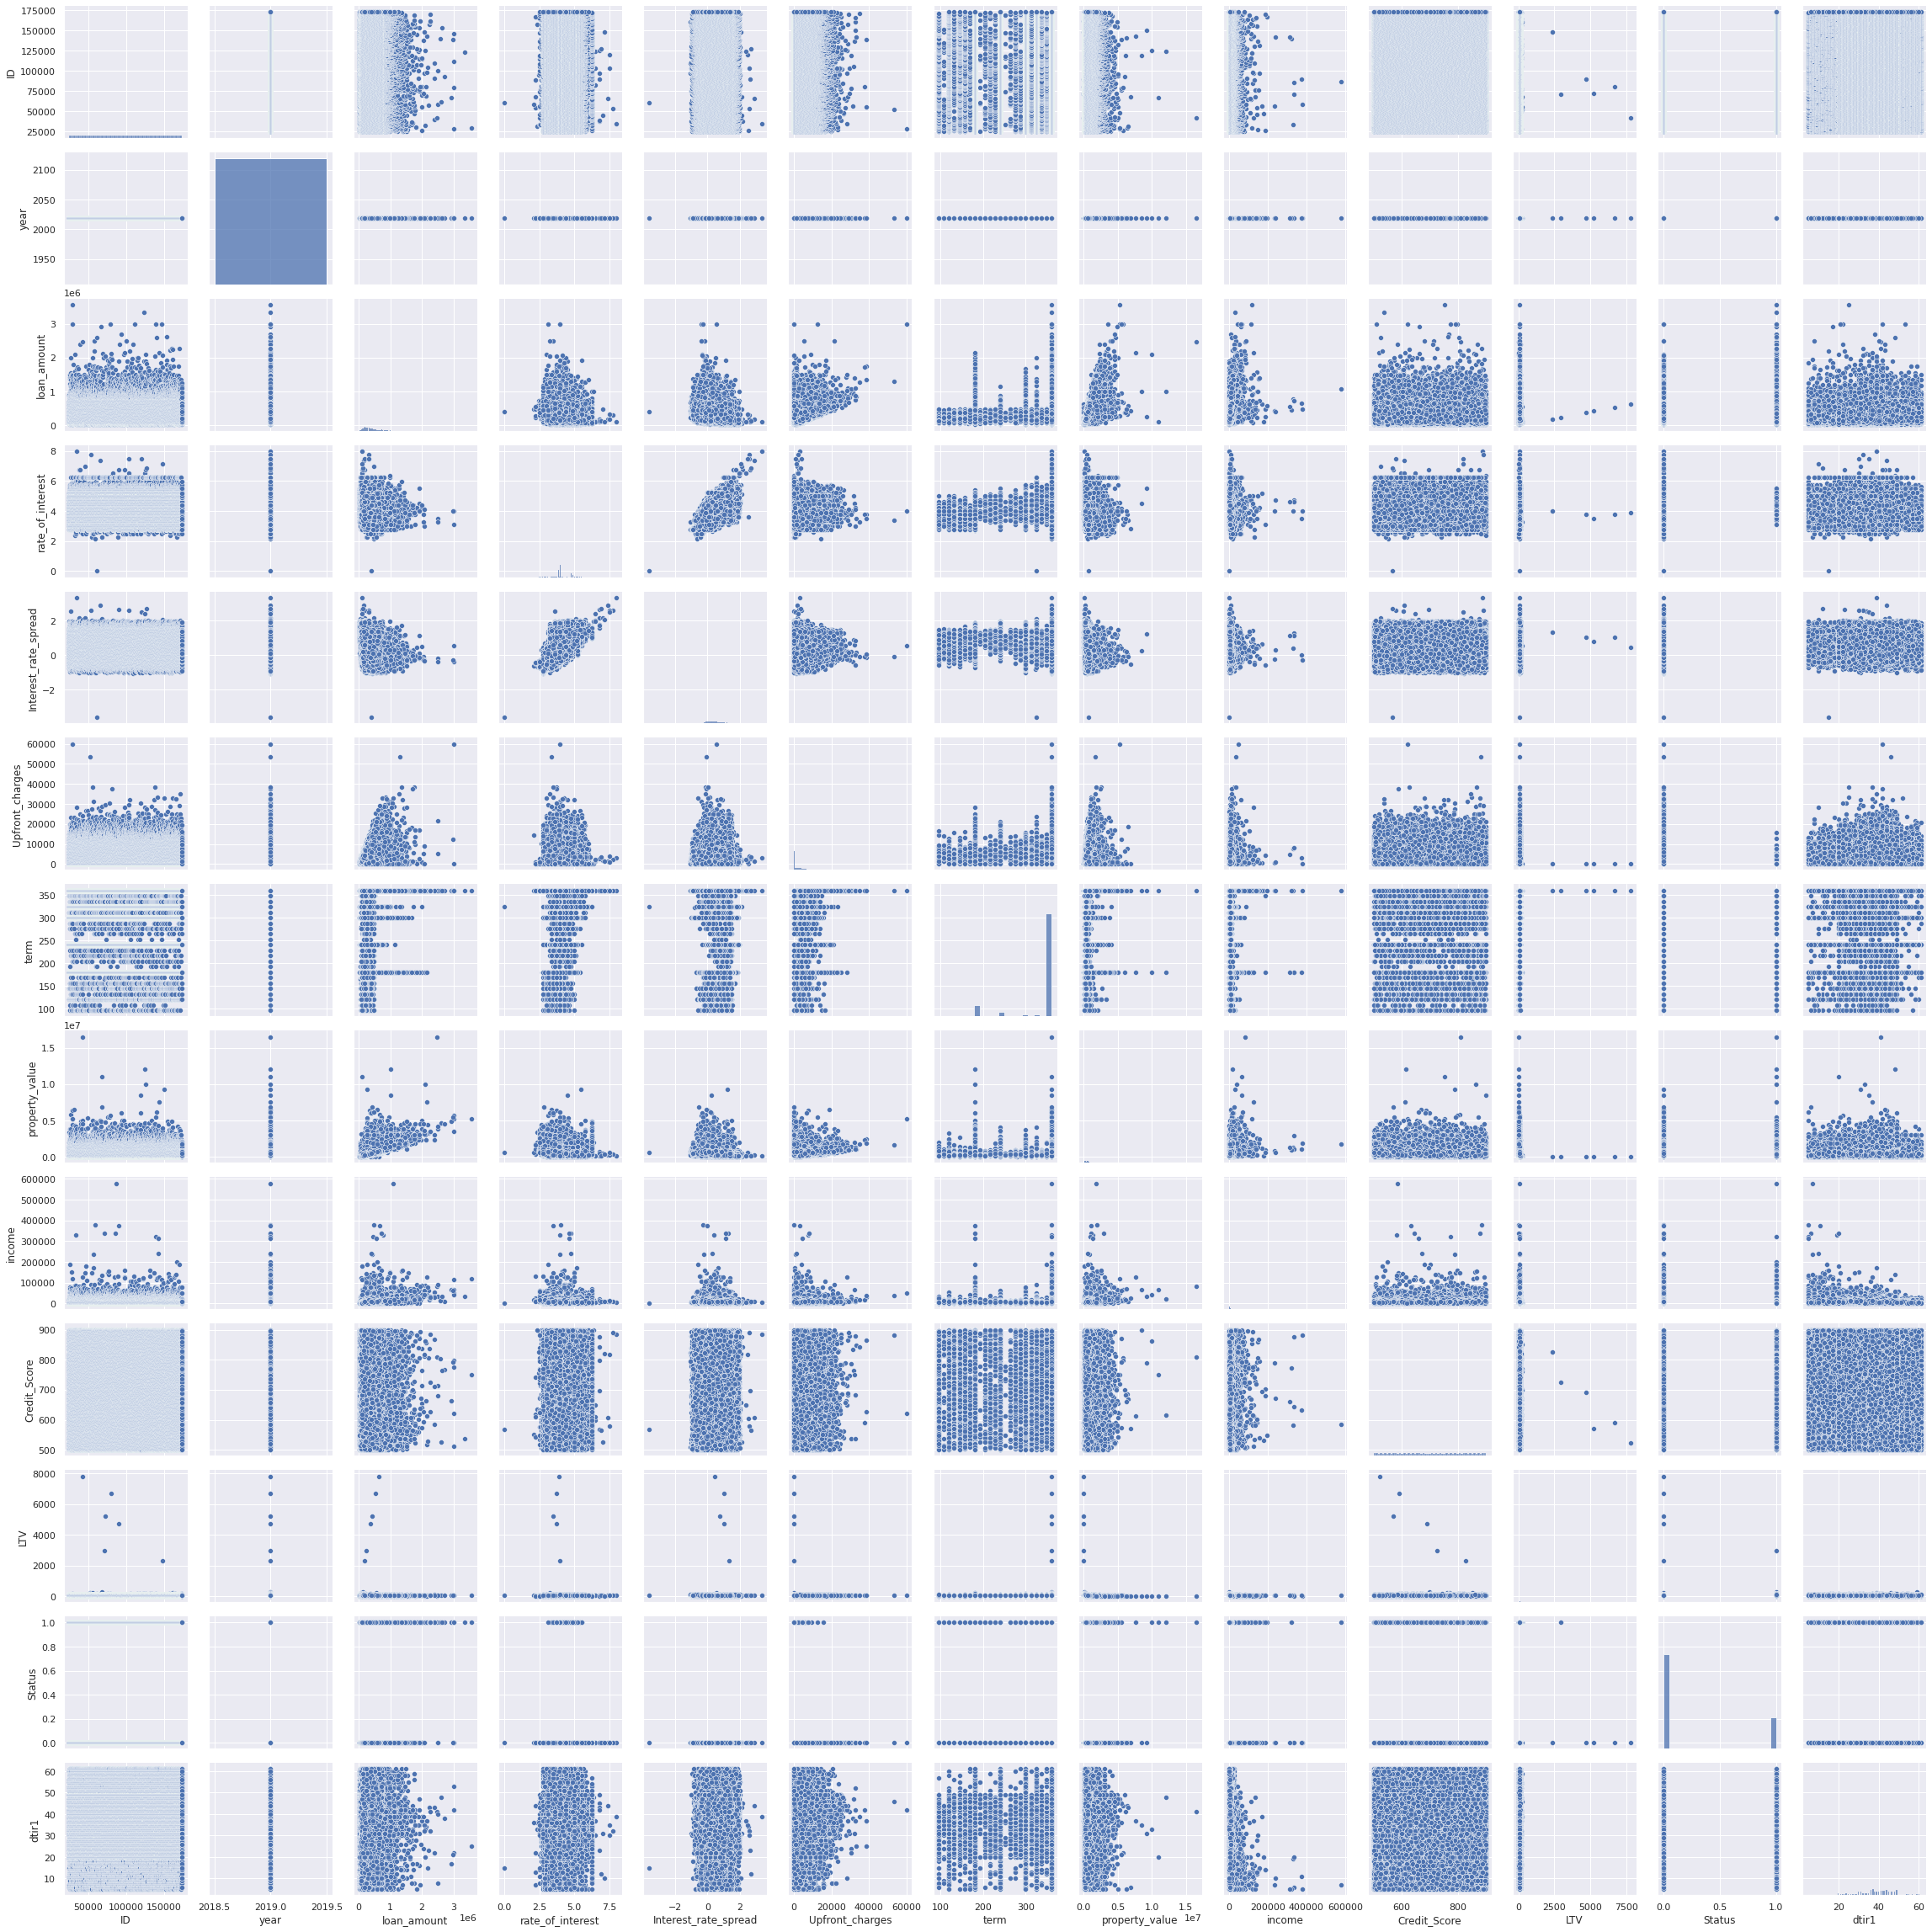

In [120]:
sns.pairplot(df)

<AxesSubplot:xlabel='loan_type', ylabel='count'>

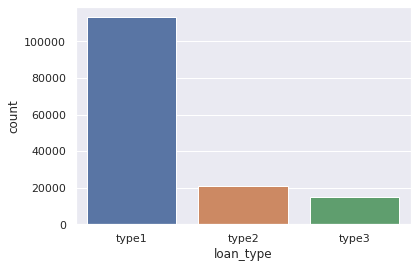

In [121]:
sns.countplot(data=df , x='loan_type')

<AxesSubplot:xlabel='Status', ylabel='count'>

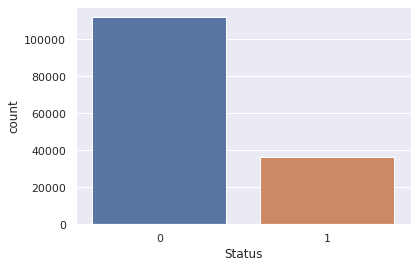

In [122]:
sns.countplot(data=df , x='Status')

<AxesSubplot:xlabel='age', ylabel='count'>

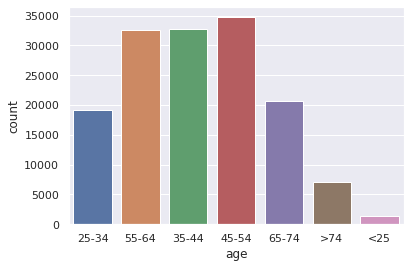

In [123]:
sns.countplot(data=df , x='age')

<AxesSubplot:xlabel='rate_of_interest', ylabel='income'>

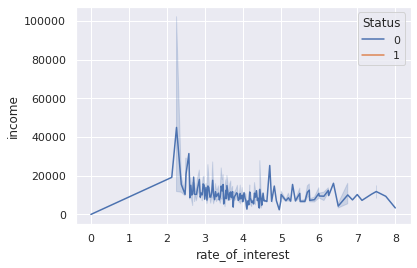

In [124]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="Status")

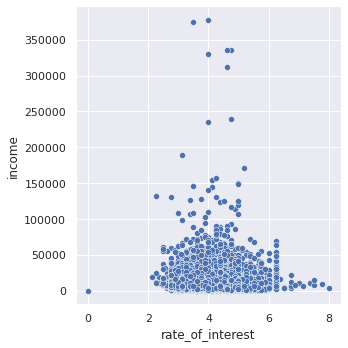

In [125]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

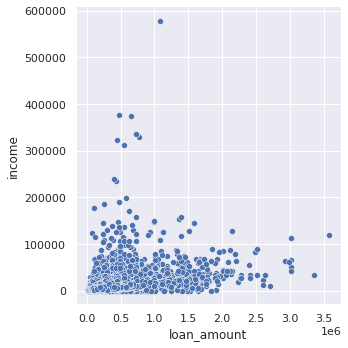

In [126]:
sns.relplot(x ="loan_amount", y ="income",data = df)

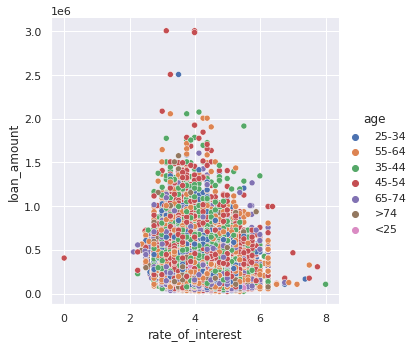

In [127]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

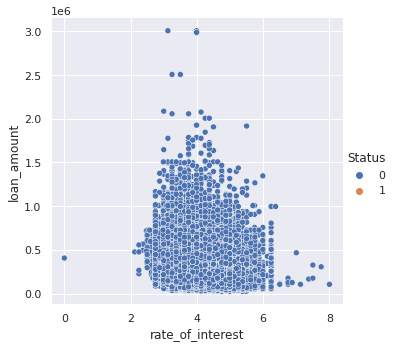

In [128]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='Status' ,data = df)

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

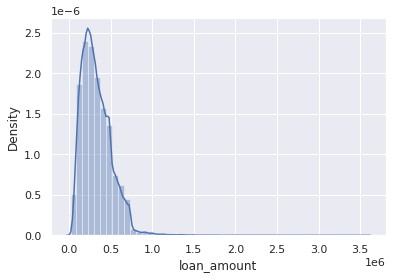

In [129]:
sns.distplot(df['loan_amount'])

<AxesSubplot:xlabel='Status', ylabel='loan_amount'>

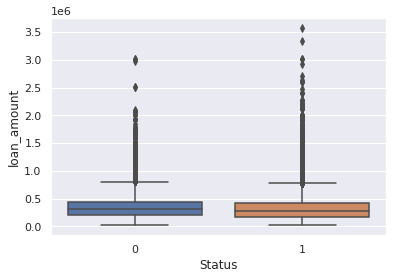

In [130]:
sns.boxplot(data=df , x='Status' , y ='loan_amount')

<AxesSubplot:xlabel='Status', ylabel='term'>

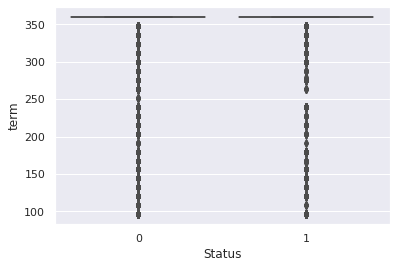

In [131]:
sns.boxplot(data=df , x='Status' , y ='term')

<AxesSubplot:xlabel='Status', ylabel='income'>

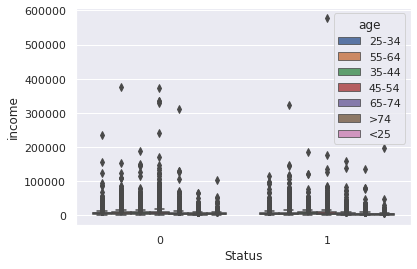

In [132]:
sns.boxplot(data=df , x='Status' , y ='income' , hue='age')

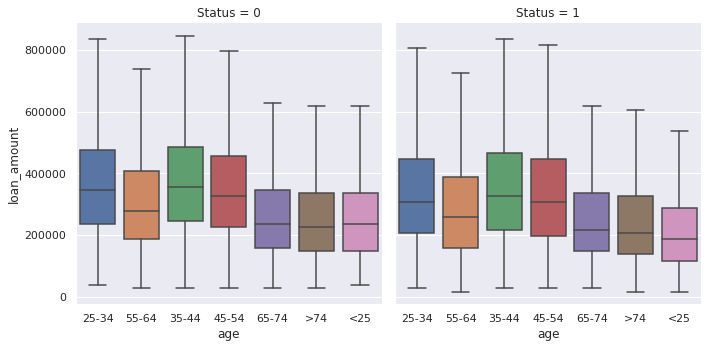

In [133]:
sns.catplot(data=df,x='age',y='loan_amount',kind='box',col='Status',sym="")

<AxesSubplot:>

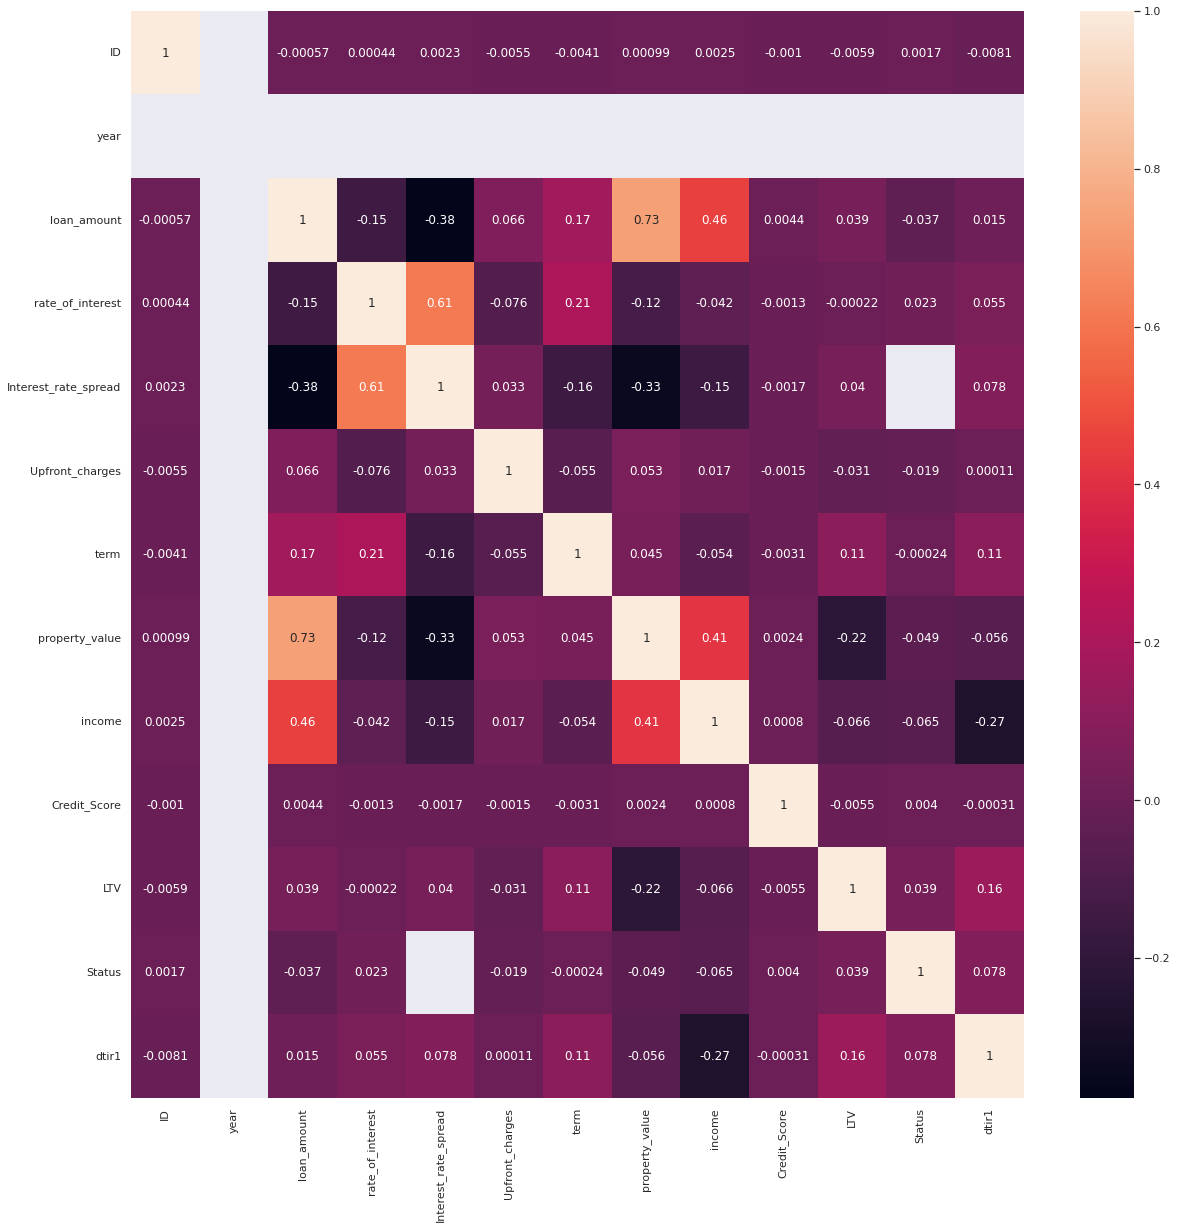

In [134]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , annot = True)

In [135]:
#droping year
df = df.drop('year' , axis = 1)

In [136]:
df

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


# Now we will handle Missing value

In [137]:
#checking null values
df.isna().sum()

ID                               0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [138]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [139]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(10)

Dataframe has 33 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Upfront_charges,39642,26.7
Interest_rate_spread,36639,24.6
rate_of_interest,36439,24.5
dtir1,24121,16.2
property_value,15098,10.2
LTV,15098,10.2
income,9150,6.2
loan_limit,3344,2.2
approv_in_adv,908,0.6
age,200,0.1


In [140]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']] = imputer.fit_transform(df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']])


imputer = SimpleImputer(strategy='most_frequent')
df[['age' ,'loan_limit']] = imputer.fit_transform(df[['age' , 'loan_limit']])

In [141]:
df.dropna(inplace = True)

In [142]:
df.isna().sum()

ID                           0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

# label encoding

In [143]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [144]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147315 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         147315 non-null  int64  
 1   loan_limit                 147315 non-null  int64  
 2   Gender                     147315 non-null  int64  
 3   approv_in_adv              147315 non-null  int64  
 4   loan_type                  147315 non-null  int64  
 5   loan_purpose               147315 non-null  int64  
 6   Credit_Worthiness          147315 non-null  int64  
 7   open_credit                147315 non-null  int64  
 8   business_or_commercial     147315 non-null  int64  
 9   loan_amount                147315 non-null  int64  
 10  rate_of_interest           147315 non-null  float64
 11  Interest_rate_spread       147315 non-null  float64
 12  Upfront_charges            147315 non-null  float64
 13  term                       14

In [145]:
df

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,0,3,0,0,0,0,0,1,116500,...,3,758,0,0,1,98.728814,3,1,1,45.000000
1,24891,0,2,0,1,0,0,0,0,206500,...,2,552,1,3,1,72.746457,0,1,1,37.732932
2,24892,0,2,1,0,0,0,0,1,406500,...,3,834,0,1,1,80.019685,3,1,0,46.000000
3,24893,0,2,0,0,3,0,0,1,456500,...,3,587,0,2,0,69.376900,0,1,0,42.000000
4,24894,0,1,1,0,0,0,0,1,696500,...,1,602,1,0,0,91.886544,0,1,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,0,3,0,0,2,0,0,1,436500,...,0,659,1,3,1,71.792763,3,1,0,48.000000
148666,173556,0,2,0,0,0,0,0,1,586500,...,0,569,0,0,0,74.428934,3,1,0,15.000000
148667,173557,0,2,0,0,3,0,0,1,446500,...,0,702,1,2,0,61.332418,0,1,0,49.000000
148668,173558,0,0,0,0,3,0,0,1,196500,...,3,737,1,3,1,70.683453,0,1,0,29.000000


# scaling the data 

In [146]:
# scaling the data after dropping target variable
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(df.drop("Status" , axis = 1)))

In [147]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.731475,-0.266356,1.322529,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,-1.169116,...,-0.827930,1.394649,0.502745,-0.997905,-1.473552,0.741861,0.683792,1.091399,0.014969,0.752519
1,-1.731452,-0.266356,0.373707,-0.430908,1.019801,-1.648031,-0.211787,-0.061384,-2.490858,-0.679480,...,-0.313822,0.557693,-1.275172,1.002100,0.499797,0.741861,0.000370,-0.974414,0.014969,0.000108
2,-1.731428,-0.266356,0.373707,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,0.408601,...,0.400217,1.394649,1.158676,-0.997905,-0.815769,0.741861,0.191680,1.091399,0.014969,0.856056
3,-1.731405,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,0.680621,...,0.781037,1.394649,-0.973099,-0.997905,-0.157986,-1.347961,-0.088260,-0.974414,0.014969,0.441908
4,-1.731382,-0.266356,-0.575116,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,1.986318,...,0.552545,-0.279264,-0.843639,1.002100,-1.473552,-1.347961,0.503817,-0.974414,0.014969,0.131297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147310,1.731984,-0.266356,1.322529,-0.430908,-0.519288,0.101783,-0.211787,-0.061384,0.401468,0.571813,...,0.143163,-1.116220,-0.351691,1.002100,0.499797,0.741861,-0.024715,1.091399,0.014969,1.063131
147311,1.732007,-0.266356,0.373707,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,1.387873,...,0.028917,-1.116220,-1.128451,-0.997905,-1.473552,-1.347961,0.044625,1.091399,0.014969,-2.353593
147312,1.732031,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,0.626217,...,-0.009165,-1.116220,0.019428,1.002100,-0.157986,-1.347961,-0.299857,-0.974414,0.014969,1.166668
147313,1.732054,-0.266356,-1.523939,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,-0.733884,...,0.028917,1.394649,0.321501,1.002100,0.499797,0.741861,-0.053894,-0.974414,0.014969,-0.904074


# Splitting the data

Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [148]:
Target = df['Status']

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Target,test_size=0.25,random_state=42,stratify=Target)

# Random Under-Sampling:


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting

In [150]:
df['Status'].value_counts()

0    111176
1     36139
Name: Status, dtype: int64

In [159]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of default classes 36139 rows.
default_df = df.loc[df['Status'] == 1]
non_default_df = df.loc[df['Status'] == 0][:36139]

normal_distributed_df = pd.concat([default_df, non_default_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
84366,109256,0,1,0,0,2,0,0,1,156500,...,3,540,1,2,1,56.294964,0,1,0,35.000000
104794,129684,0,3,0,2,2,0,0,1,226500,...,0,809,0,3,1,95.168067,3,1,1,60.000000
108137,133027,0,3,0,0,2,0,0,1,316500,...,3,644,0,2,1,39.170792,3,1,0,44.000000
93575,118465,0,1,1,0,0,0,0,1,526500,...,2,894,1,1,0,72.746457,0,1,1,37.732932
133288,158178,0,1,0,0,2,1,0,1,276500,...,2,802,1,1,1,72.746457,3,1,1,37.732932


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Status, dtype: float64


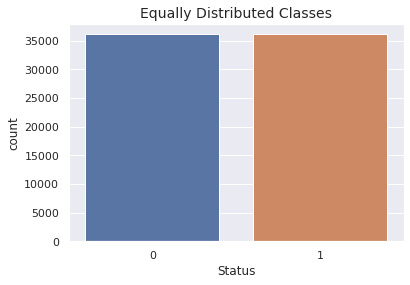

In [160]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Status'].value_counts()/len(new_df))



sns.countplot('Status', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Model Building

In [165]:
#new x_train and y train
x_train = new_df.drop('Status',axis=1)
y_train = new_df['Status']

# KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [167]:
fin=accuracy_score(y_test,y_pred)
fin

0.24532297917402046

In [168]:
print(knn.score(x_train,y_train))

0.7730429729654943


In [171]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    0 27794]
 [    0  9035]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27794
           1       0.25      1.00      0.39      9035

    accuracy                           0.25     36829
   macro avg       0.12      0.50      0.20     36829
weighted avg       0.06      0.25      0.10     36829



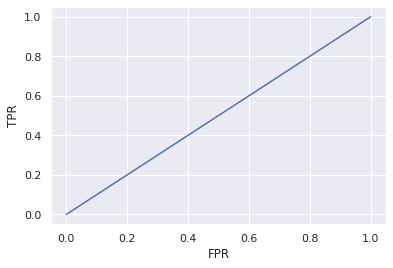

In [172]:
from sklearn.metrics import roc_curve
y_pred_proba=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [174]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5

In [175]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.39399092970521543

# Logistic Regression and CART

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=10)
classifiers=[('Logistic Regression',lr),('CART',dt)]

In [177]:
for clf_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf_name,accuracy_score(y_test,y_pred))
    print(f'Train Accuracy:{clf.score(x_train,y_train)}')

Logistic Regression 0.5104944473105433
Train Accuracy:0.5551343424001771
CART 0.7546770208259795
Train Accuracy:1.0


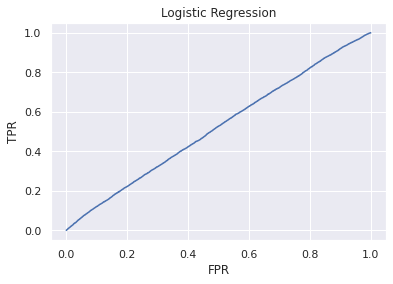

AUC SCORE:0.5210649350452827
F1 Score: 0.0


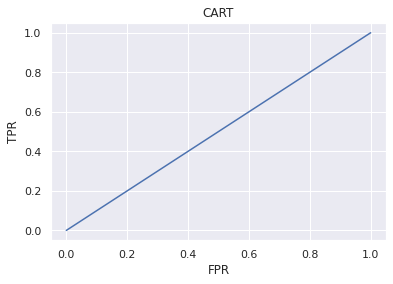

AUC SCORE:0.5
F1 Score: 0.0


In [178]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for clf_name,clf in classifiers:
    y_pred_proba=clf.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(y_test,y_pred_proba)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')

# Voting classifier

In [179]:
vc=VotingClassifier(estimators=classifiers,voting='soft')
vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(f'Train Accuracy:{vc.score(x_train,y_train)}')

0.7546770208259795
Train Accuracy:1.0


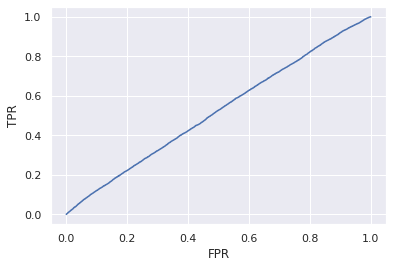

In [180]:
from sklearn.metrics import roc_curve
y_pred_proba=vc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [181]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5210649350452827

In [182]:
f1_score(y_test, y_pred)

0.0

# Bagging

In [183]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=16)
bc=BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [184]:
print(bc.score(x_train,y_train))

1.0


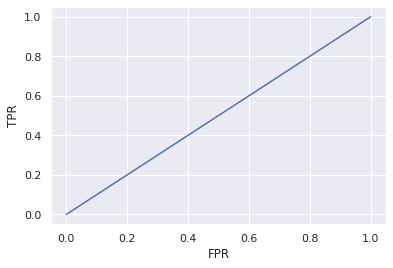

In [185]:
from sklearn.metrics import roc_curve
y_pred_proba=bc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [186]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)


0.5

In [187]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



In [190]:
f1_score(y_pred,y_test)

0.0

# Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,n_jobs=-1,min_samples_leaf=0.01)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [192]:
print(rf.score(x_train,y_train))

1.0


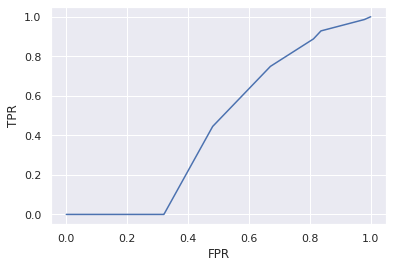

In [193]:
from sklearn.metrics import roc_curve
y_pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [194]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.444055817169237

In [195]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



# AdaBoostClassifier

In [196]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=dt,n_estimators=1)
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [197]:
print(ad.score(x_train,y_train))

1.0


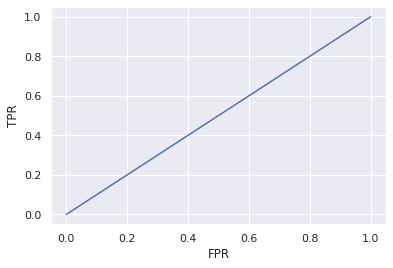

In [198]:
from sklearn.metrics import roc_curve
y_pred_proba=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [199]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5

In [200]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



# GradientBoosting

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=17,max_depth=12)
gbc.fit(x_train, y_train)
y_pred=gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [202]:
print(gbc.score(x_train,y_train))

1.0


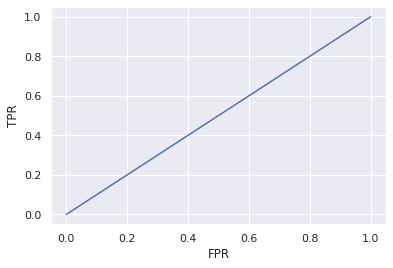

In [203]:
y_pred_proba=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [204]:
roc_auc_score(y_test,y_pred_proba)

0.5

In [205]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



# Deep learning

In [216]:
from tensorflow.keras.optimizers import Adam


In [222]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50 , validation_split=0.2)

Epoch 1/50
1807/1807 [==============================] - 6s 3ms/step - loss: 0.5069 - accuracy: 0.7706 - val_loss: 0.1379 - val_accuracy: 0.9861
Epoch 2/50
1807/1807 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9713 - val_loss: 0.0202 - val_accuracy: 0.9967
Epoch 3/50
1807/1807 [==============================] - 5s 3ms/step - loss: 0.0754 - accuracy: 0.9791 - val_loss: 0.0072 - val_accuracy: 0.9978
Epoch 4/50
1807/1807 [==============================] - 5s 2ms/step - loss: 0.0641 - accuracy: 0.9815 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 5/50
1807/1807 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0019 - val_accuracy: 0.9994
Epoch 6/50
1807/1807 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 7/50
1807/1807 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 6.9671e-04 - val_accur

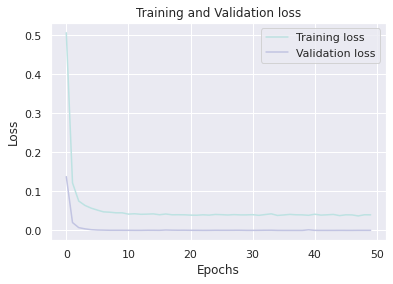

In [223]:
#Plotting training and validation loss over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

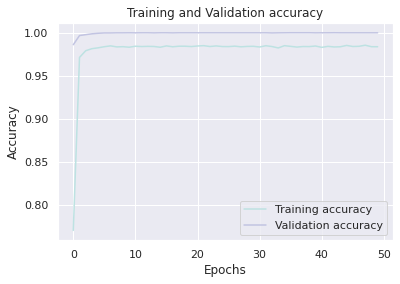

In [224]:
#Plotting training and validation accuracy over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [231]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

<AxesSubplot:>

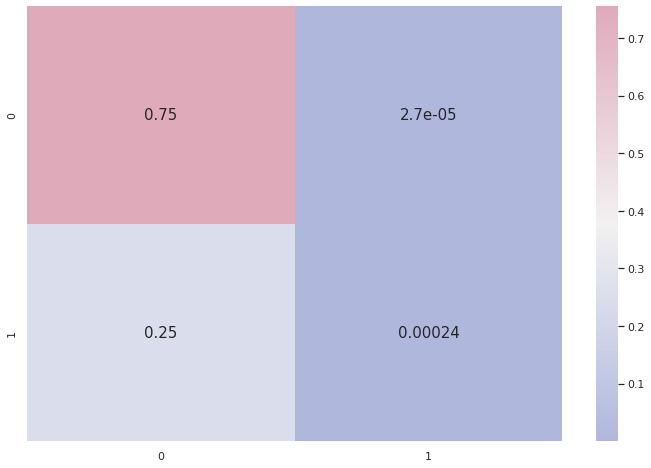

In [232]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.90      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.83      0.50      0.43     36829
weighted avg       0.79      0.75      0.65     36829

